# Simple Linear Regression
link -> https://online.stat.psu.edu/stat462/node/91/ </br>

Simple linear regression is a statistical method that allows us to summarize and study relationships between **two continuous (quantitative) variables**

one of variable is **Independent Variable** : also called "mainpulated variable", the variable whose doesn't dependent on any other variables</br>
another variable is **dependent Variable** : also called "responding variable", different with Independent Variable, the dependent variable affects by Independent Variable 

> Let Independent Variable denote by X, and dependent Variable denote by Y.
> then we get the regression model Y = C1*X + C0</br>
> C1 is slope of function</br>
> C0 is intercept of function</br>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [3]:
dataSet = pd.read_csv("Salary_Data.csv")
print(dataSet.info())
dataSet.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes
None


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [4]:
# check missing
dataSet.isna().any()

YearsExperience    False
Salary             False
dtype: bool

In [5]:
# Use years experience to predict Salary
IndependentV = dataSet["YearsExperience"].values.reshape(-1,1)
dependentV = dataSet["Salary"].values.reshape(-1,1)

In [6]:
from sklearn.model_selection import train_test_split
IndependentV_train, IndependentV_test, dependentV_train, dependentV_test = train_test_split(IndependentV, dependentV, test_size=0.2, random_state=0)

In [7]:
from sklearn.linear_model import LinearRegression

# train
model = LinearRegression()
model.fit(IndependentV_train, dependentV_train)

# predict
predict = model.predict(IndependentV_test)

# Data Visualization

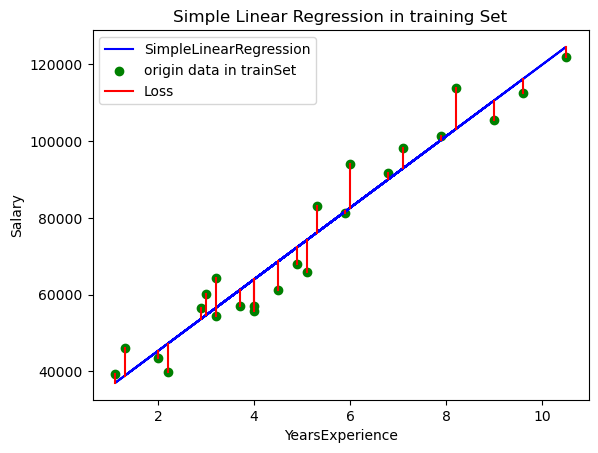

In [12]:
trainResult = model.predict(IndependentV_train)
plt.plot(IndependentV_train, trainResult, color="blue",  label="SimpleLinearRegression")
plt.scatter(IndependentV_train, dependentV_train, color="green", label="origin data in trainSet")

plot_list=[]
for index in range(0, len(IndependentV_train)):
    Loss_plot = plt.plot( [IndependentV_train[index], IndependentV_train[index]],  [dependentV_train[index], trainResult[index]], color="red", label="Loss")
    plot_list.append(Loss_plot)

plt.setp(plot_list[1:], label="_")

plt.title("Simple Linear Regression in training Set")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.show()

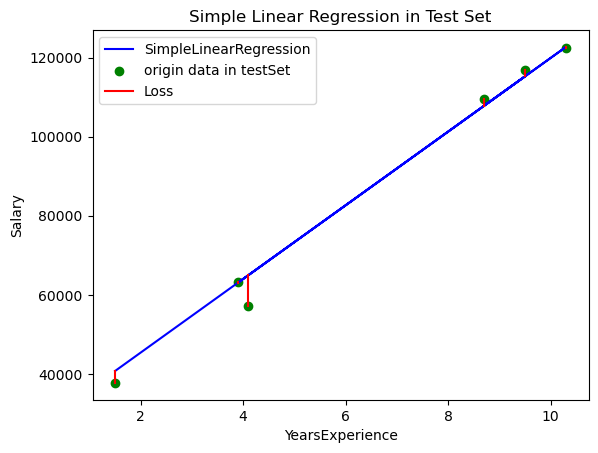

In [10]:
plt.plot(IndependentV_test, predict, color="blue",  label="SimpleLinearRegression")
plt.scatter(IndependentV_test, dependentV_test, color="green", label="origin data in testSet")

plot_list=[]
for index in range(0, len(IndependentV_test)):
    Loss_plot = plt.plot( [IndependentV_test[index], IndependentV_test[index]],  [dependentV_test[index], predict[index]], color="red", label="Loss")
    plot_list.append(Loss_plot)

plt.setp(plot_list[1:], label="_")

plt.title("Simple Linear Regression in Test Set")
plt.xlabel("YearsExperience")
plt.ylabel("Salary")
plt.legend()
plt.show()